In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


# 데이터 불러오기
df = pd.read_csv("../Amazon_dataset/titles.csv")# pd.set_option('display.max_rows', None)
# df[['imdb_id', 'imdb_score', 'tmdb_popularity', 'tmdb_score']]
df.isna().sum()
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,NaN,129,"['action', 'thriller', 'crime']",['IN'],NaN,tt21946058,5.8,1269.0,4.403,4.300
10869,tm1284753,Ennalum Ente Aliya,MOVIE,It tells the story of a teen girl from a Musli...,2023,NaN,113,"['drama', 'comedy']",['IN'],NaN,tt23805304,5.6,812.0,3.406,8.000
10870,tm1303380,Anubhav Singh Bassi: Bas Kar Bassi,MOVIE,"Fresh out of national law university, Bassi ar...",2023,NaN,83,['comedy'],[],NaN,tt26548127,8.3,10.0,1.960,NaN
10871,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN


In [3]:
# 데이터셋 구조 파악
print("데이터셋 크기:", df.shape)
print("열(변수)의 개수:", len(df.columns))
print("열의 이름:", df.columns)



데이터셋 크기: (10873, 15)
열(변수)의 개수: 15
열의 이름: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [4]:
# 데이터셋 살펴보기 (상위 5개 데이터 출력)
print("\n상위 5개 데이터:")
print(df.head())




상위 5개 데이터:
         id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   
3   ts20945      The Three Stooges   SHOW   
4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   
2  Hildy, the journalist former wife of newspaper...          1940   
3  The Three Stooges were an American vaudeville ...          1934   
4  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  \
0                PG      130   
1               NaN       69   
2               NaN       92   
3             TV-PG       19   
4               NaN      133   

                                              genres production_countries  \
0  ['drama', 'family', 'fa

In [5]:
# 기본적인 통계 분석
print("\n수치형 열의 기술 통계량:")
print(df.describe())




수치형 열의 기술 통계량:
       release_year       runtime      seasons   imdb_score    imdb_votes  \
count  10873.000000  10873.000000  1551.000000  9765.000000  9.753000e+03   
mean    2004.077807     85.869033     2.661509     5.970558  8.973232e+03   
std       24.883711     34.156332     3.719633     1.362815  4.897767e+04   
min     1912.000000      0.000000     1.000000     1.100000  5.000000e+00   
25%     2002.000000     65.000000     1.000000     5.100000  1.190000e+02   
50%     2015.000000     89.000000     1.000000     6.100000  4.880000e+02   
75%     2019.000000    102.000000     3.000000     7.000000  2.493000e+03   
max     2023.000000    940.000000    53.000000     9.900000  2.081757e+06   

       tmdb_popularity   tmdb_score  
count     10302.000000  8747.000000  
mean          7.614083     5.977729  
std          45.845289     1.512941  
min           0.000153     0.500000  
25%           1.327250     5.066500  
50%           2.658500     6.000000  
75%           6.185000  

In [6]:
# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())




결측치 개수:
id                         0
title                      0
type                       0
description              144
release_year               0
age_certification       7185
runtime                    0
genres                     0
production_countries       0
seasons                 9322
imdb_id                  701
imdb_score              1108
imdb_votes              1120
tmdb_popularity          571
tmdb_score              2126
dtype: int64


In [7]:
# 범주형 열의 고유값 개수
print("\n범주형 열의 고유값 개수:")
for column in df.select_dtypes(include='object'):
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")



범주형 열의 고유값 개수:
id: 10873 unique values
title: 10708 unique values
type: 2 unique values
description: 10718 unique values
age_certification: 12 unique values
genres: 2324 unique values
production_countries: 569 unique values
imdb_id: 10172 unique values


In [8]:
# 열간 상관관계
print("\n열간 상관관계:")
print(df.corr())




열간 상관관계:
                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000  0.058485 -0.426794    0.023712    0.007418   
runtime              0.058485  1.000000 -0.087803   -0.098841    0.103828   
seasons             -0.426794 -0.087803  1.000000    0.018968    0.098564   
imdb_score           0.023712 -0.098841  0.018968    1.000000    0.159119   
imdb_votes           0.007418  0.103828  0.098564    0.159119    1.000000   
tmdb_popularity      0.039821 -0.021442  0.243162    0.067423    0.197859   
tmdb_score           0.103137 -0.057736  0.023313    0.572374    0.146485   

                 tmdb_popularity  tmdb_score  
release_year            0.039821    0.103137  
runtime                -0.021442   -0.057736  
seasons                 0.243162    0.023313  
imdb_score              0.067423    0.572374  
imdb_votes              0.197859    0.146485  
tmdb_popularity         1.000000    0.074241  
tmdb_score              0.074241    1.000000

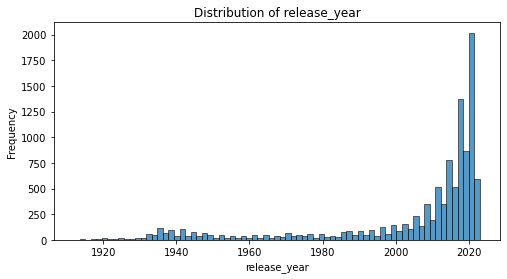

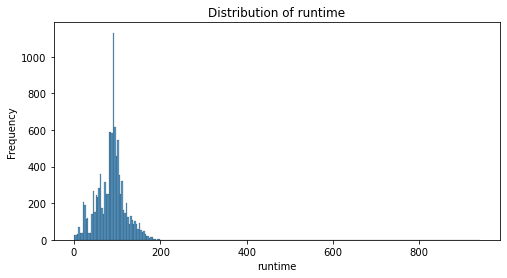

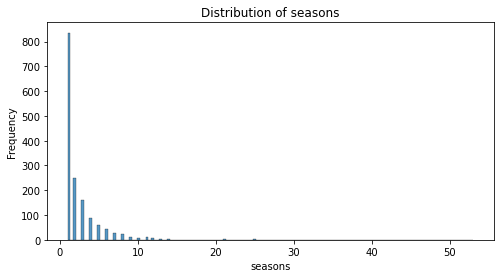

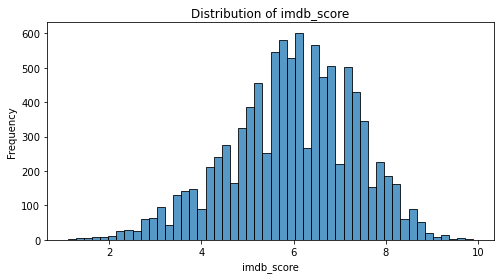

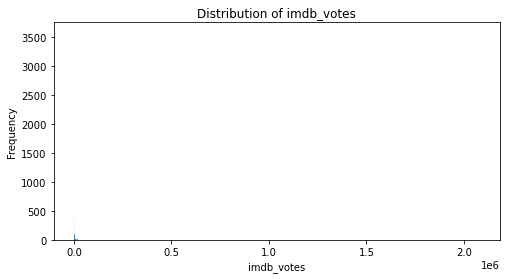

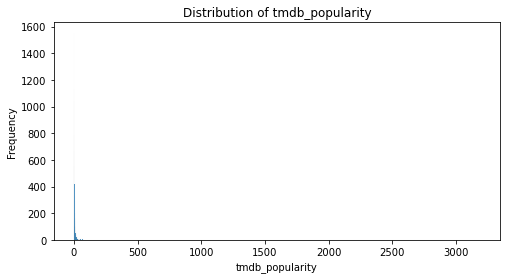

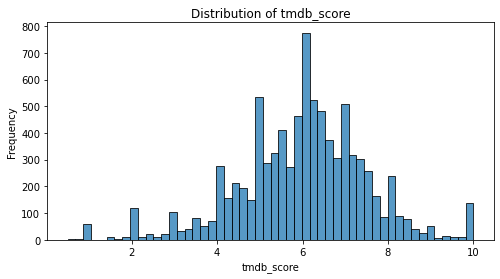

In [9]:
# 수치형 열의 분포 시각화
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column].dropna())
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

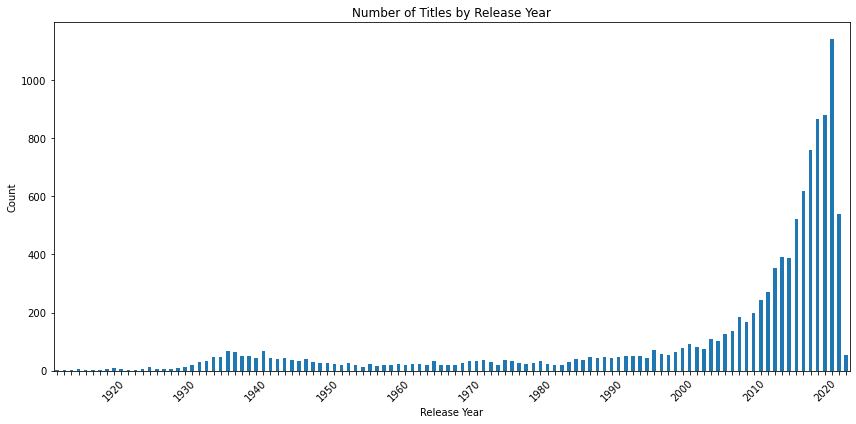

In [15]:
import numpy as np

# release_year 열의 데이터 전처리
df['release_year'] = df['release_year'].fillna('Unknown')  # 결측치를 'Unknown'으로 대체

# 각 연도별 등장 횟수 계산
year_counts = df['release_year'].value_counts().sort_index()

# 그래프로 시각화
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Titles by Release Year')
xtick_labels = [year if year % 10 == 0 else '' for year in year_counts.index]
plt.xticks(np.arange(len(year_counts.index)), xtick_labels, rotation=45)
plt.tight_layout()
plt.show()

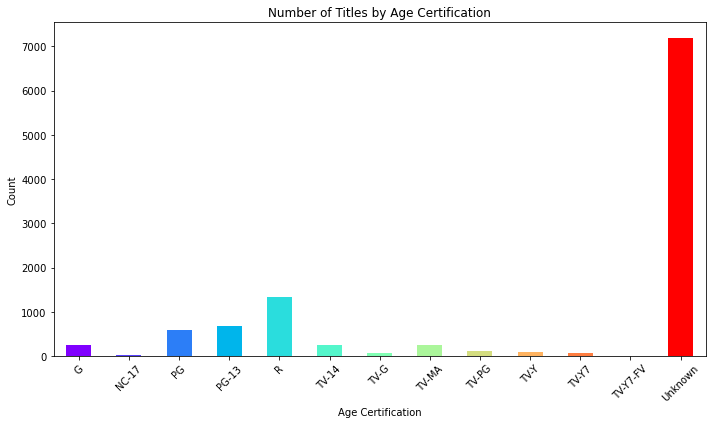

In [17]:
# age_certification 열의 데이터 전처리
df['age_certification'] = df['age_certification'].fillna('Unknown')  # 결측치를 'Unknown'으로 대체

# 각 연령 인증별 등장 횟수 계산
age_counts = df['age_certification'].value_counts()

# 알파벳 순으로 정렬
age_counts = age_counts.sort_index()

# 그래프로 시각화
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(age_counts))))
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Number of Titles by Age Certification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

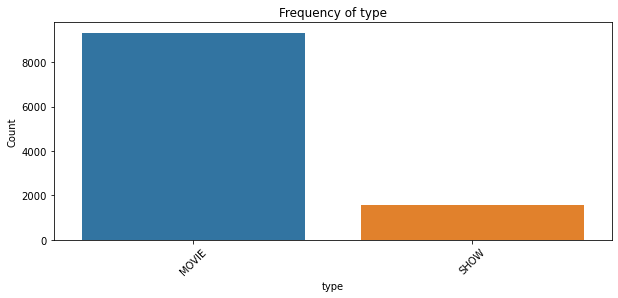

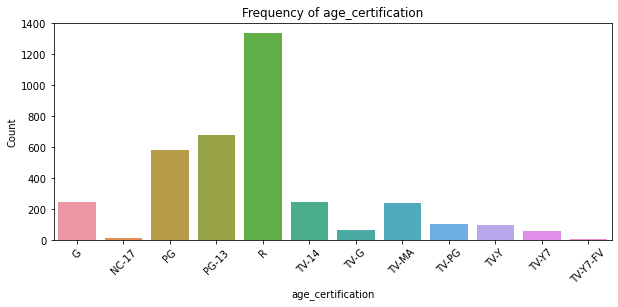

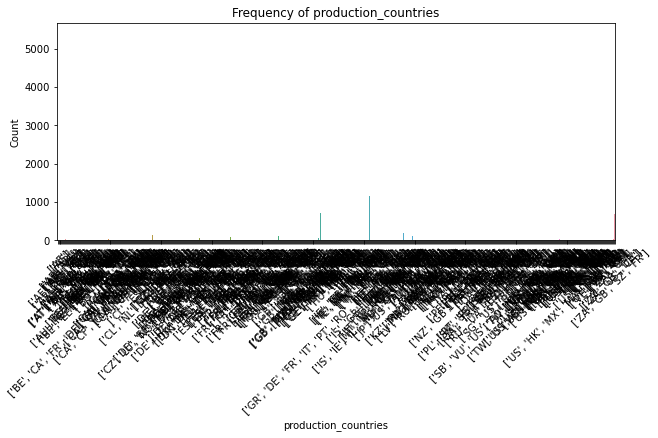

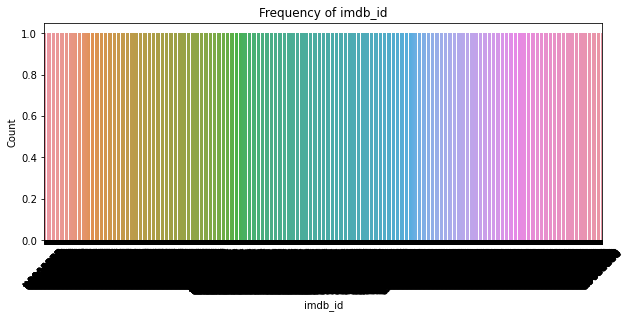

In [16]:
# 범주형 열의 빈도수 시각화 (id, title, description 열 제외)
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns = [column for column in categorical_columns if column not in ['id', 'title', 'description', 'genres']]

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column, order=sorted(df[column].value_counts().index))
    plt.title(f"Frequency of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# genre 열의 데이터를 쉼표를 기준으로 분리하여 합집합 만들기
genres = set()
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        genres.update(genre_list.split(','))



In [12]:
# 각 리스트의 원소를 포함하는 빈도수 계산
genre_counts = {genre: 0 for genre in genres}
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        for genre in genre_list.split(','):
            genre = genre.strip()
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1


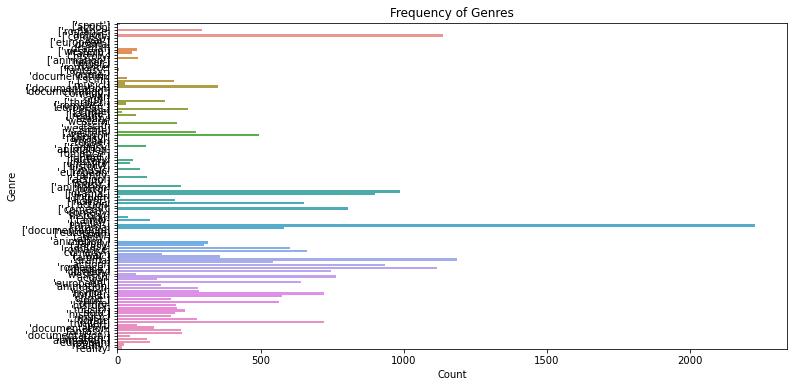

In [13]:
# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title("Frequency of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()



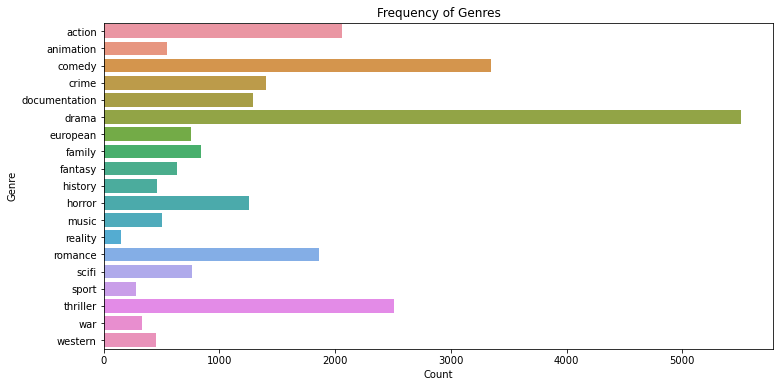

In [14]:
import re

# genre 열의 데이터를 쉼표를 기준으로 분리하여 알파벳만 남긴 문자열로 변환하여 합집합 만들기
genres = set()
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        genres.update(re.findall(r'[a-zA-Z]+', genre_list))


# 보기 쉽게 알파벳 순 정렬
genres = sorted(list(genres))

        
# 각 문자열의 빈도수 계산
genre_counts = {genre: 0 for genre in genres}
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        for genre in re.findall(r'[a-zA-Z]+', genre_list):
            genre = genre.lower()
            genre_counts[genre] += 1

# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title("Frequency of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

/var/folders/yf/gjfgf6ln6174lclcvt3pmlc00000gn/T/ipykernel_11435/528745617.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_countries'] = df['production_countries'].str.replace("[", "")
/var/folders/yf/gjfgf6ln6174lclcvt3pmlc00000gn/T/ipykernel_11435/528745617.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_countries'] = df['production_countries'].str.replace("]", "")


<Figure size 864x432 with 0 Axes>

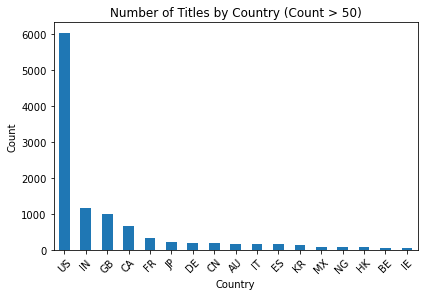

In [24]:
# production_country 열의 데이터 전처리
df = pd.read_csv("../Amazon_dataset/titles.csv")# pd.set_option('display.max_rows', None)


# 데이터 전처리
df['production_countries'] = df['production_countries'].fillna('Unknown')  # 결측치를 'Unknown'으로 대체
df['production_countries'] = df['production_countries'].str.strip()  # 공백 제거
df['production_countries'] = df['production_countries'].str.replace("[", "")
df['production_countries'] = df['production_countries'].str.replace("]", "")
df['production_countries'] = df['production_countries'].str.replace(",", "")
df['production_countries'] = df['production_countries'].str.replace("'", "")
df['production_countries'] = df['production_countries'].str.split(" ")

# print(df['production_countries'])

# 각 나라의 등장 횟수 계산
country_counts = {}
for countries in df['production_countries']:
#     print(countries)
    for country in countries:
#         print(country)
        if country in country_counts:
            country_counts[country] += 1
        else:
            country_counts[country] = 1

# 등장 횟수가 50 이상인 나라만 선택 및 빈 문자열 제거
filtered_country_counts = {country: count for country, count in country_counts.items() if count > 50 and len(country) > 0}


# 그래프로 시각화
country_df = pd.DataFrame.from_dict(filtered_country_counts, orient='index', columns=['Count'])
country_df = country_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
country_df.plot(kind='bar', legend=None)
plt.xlabel('Country')
plt.ylabel('Count')

# 나라 이름을 문자열로 변환하여 x축에 표시
plt.xticks(rotation=45)
plt.tight_layout()

plt.title('Number of Titles by Country (Count > 50)')
plt.show()